<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20RF-LSTM%20for%2023%20class%20classifications%20based%20on%20NSL-KDD(12272023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hybrid RF-LSTM for 4 class classifications based on WSNBFSF dataset ver.2.2**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
# Load dataset
dataset = pd.read_csv("dataset_NSL-KDD.csv")
dataset.isnull().sum()

duration                            0
protocol_Label                      0
service_label                       0
flag_label                          0
src_bytes                           0
dst_bytes' real                     0
land                                0
wrong_fragment                      0
urgent                              0
hot                                 0
num_failed_logins                   0
logged_in                           0
num_compromised                     0
root_shell                          0
su_attempted                        0
num_root                            0
num_file_creations                  0
num_shells                          0
num_access_files                    0
num_outbound_cmds                   0
is_host_login                       0
is_guest_login                      0
count                               0
srv_count                           0
serror_rate                         0
srv_serror_rate                     0
rerror_rate 

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   duration                          125973 non-null  int64  
 1   protocol_Label                    125973 non-null  int64  
 2   service_label                     125973 non-null  int64  
 3   flag_label                        125973 non-null  int64  
 4   src_bytes                         125973 non-null  int64  
 5   dst_bytes' real                   125973 non-null  int64  
 6   land                              125973 non-null  int64  
 7   wrong_fragment                    125973 non-null  int64  
 8   urgent                            125973 non-null  int64  
 9   hot                               125973 non-null  int64  
 10  num_failed_logins                 125973 non-null  int64  
 11  logged_in                         125973 non-null  i

In [4]:
dataset["Class"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17,
       16, 21, 18, 19, 22, 20])

In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=23)  # update to 23 classes
X = dataset.drop(['Class'], axis=1)
X = X.values
print(X.shape)
print(y.shape)

(125973, 42)
(125973, 23)


In [6]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[0.0e+00 0.0e+00 0.0e+00 ... 5.0e-02 0.0e+00 2.0e+01]
 [0.0e+00 1.0e+00 1.0e+00 ... 0.0e+00 0.0e+00 1.5e+01]
 [0.0e+00 0.0e+00 2.0e+00 ... 0.0e+00 0.0e+00 1.9e+01]
 ...
 [0.0e+00 0.0e+00 1.5e+01 ... 1.0e-02 0.0e+00 1.8e+01]
 [0.0e+00 0.0e+00 3.5e+01 ... 0.0e+00 0.0e+00 2.0e+01]
 [0.0e+00 0.0e+00 0.0e+00 ... 0.0e+00 0.0e+00 2.1e+01]]
[0 0 1 ... 0 1 0]


In [7]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 67343, 1: 41214, 7: 3633, 3: 3599, 4: 2931, 8: 2646, 6: 1493, 10: 956, 5: 892, 2: 890, 9: 201, 11: 53, 15: 30, 16: 20, 18: 18, 17: 11, 14: 10, 19: 9, 12: 8, 13: 7, 21: 4, 20: 3, 22: 2})


In [8]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 67343, 1: 67343, 2: 67343, 3: 67343, 4: 67343, 5: 67343, 6: 67343, 7: 67343, 8: 67343, 9: 67343, 10: 67343, 11: 67343, 12: 67343, 13: 67343, 14: 67343, 15: 67343, 17: 67343, 16: 67343, 21: 67343, 18: 67343, 19: 67343, 22: 67343, 20: 67343})


**Data Preprocessing**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Hybrid RF-LSTM for 4 class Ver.2.2**

In [10]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.regularizers import l2
import numpy as np

# Train RF model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Extract features from RF model
train_rf_features = rf_model.predict(X_train)
test_rf_features = rf_model.predict(X_test)

# Reshape RF features for LSTM input
#train_rf_features = np.reshape(train_rf_features, (train_rf_features.shape[0], 1, train_rf_features.shape[1]))
#test_rf_features = np.reshape(test_rf_features, (test_rf_features.shape[0], 1, test_rf_features.shape[1]))

# Reshape the RF features for LSTM input
train_rf_features = np.reshape(train_rf_features, (train_rf_features.shape[0], 1, 1))
test_rf_features = np.reshape(test_rf_features, (test_rf_features.shape[0], 1, 1))

In [11]:
# Train LSTM model with RF features
from tensorflow.keras.utils import to_categorical

lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, train_rf_features.shape[2]), return_sequences=True, kernel_regularizer=l2(0.001)))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.001)))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(16, kernel_regularizer=l2(0.001)))
lstm_model.add(Dropout(0.5))
#lstm_model.add(Dense(4, activation='softmax'))
lstm_model.add(Dense(23, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
y_train = to_categorical(y_train, num_classes=23)  # One-hot encode y_train
history = lstm_model.fit(train_rf_features, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate hybrid model on test set
test_lstm_features = lstm_model.predict(test_rf_features)
test_rf_lstm_predictions = np.argmax(test_lstm_features, axis=1)

print(confusion_matrix(np.argmax(y_test, axis=1), test_rf_lstm_predictions))
print(classification_report(np.argmax(y_test, axis=1), test_rf_lstm_predictions))

# Plot training/validation loss over each epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/50
15489/15489 [==============================] - 129s 8ms/step - loss: 1.6435 - accuracy: 0.3767 - val_loss: 1.0238 - val_accuracy: 0.8690
Epoch 2/50
15489/15489 [==============================] - 119s 8ms/step - loss: 1.3590 - accuracy: 0.4583 - val_loss: 0.8020 - val_accuracy: 0.9568
Epoch 3/50
15489/15489 [==============================] - 122s 8ms/step - loss: 1.2517 - accuracy: 0.4977 - val_loss: 0.7171 - val_accuracy: 0.9561
Epoch 4/50
15489/15489 [==============================] - 121s 8ms/step - loss: 1.1812 - accuracy: 0.5281 - val_loss: 0.6458 - val_accuracy: 0.9122
Epoch 5/50
15489/15489 [==============================] - 120s 8ms/step - loss: 1.1288 - accuracy: 0.5546 - val_loss: 0.5854 - val_accuracy: 0.9561
Epoch 6/50
15489/15489 [==============================] - 119s 8ms/step - loss: 1.0930 - accuracy: 0.5731 - val_loss: 0.5588 - val_accuracy: 0.9561
Epoch 7/50
15489/15489 [==============================] - 120s 8ms/step - loss: 1.0556 - accuracy: 0.5905 - val_

AxisError: ignored

Confusion Matrix:
[[13304     1     1     0     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     1     0     0     0     0]
 [    0 13430     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0 13345     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0 13315     0     0    28     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0 13425     0     5     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0 13575     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0 13351     0     0     0     0     0
      0     0     0     0     0     0     0     0 

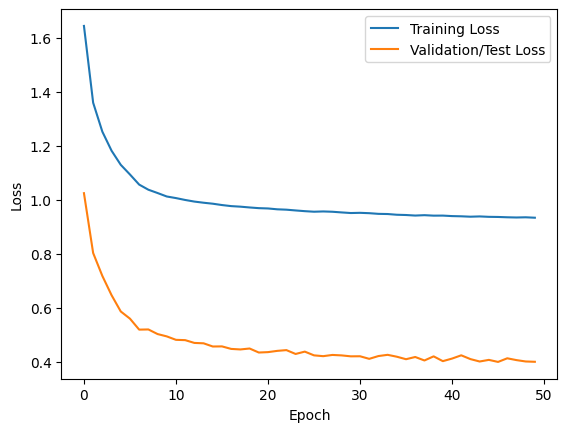

In [13]:
import collections as c

# Calculate the confusion matrix and classification report
# Ensure that y_test and test_rf_lstm_predictions are 2D arrays
confusion = confusion_matrix(y_test, test_rf_lstm_predictions)
classification_report_result = classification_report(y_test, test_rf_lstm_predictions)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_report_result)

# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# Compute TP, TN, FP, FN for each class
cm = confusion_matrix(y_test, test_rf_lstm_predictions)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Compute False Positive Rate (FPR) and True Positive Rate (TPR) for each class
FPR = FP / (FP + TN)
TPR = TP / (TP + FN)

# Print FPR and TPR for each class
for i in range(23):
    print(f"Class {i} - FPR: {FPR[i]}, TPR: {TPR[i]}")

Class 0 - FPR: 0.0, TPR: 0.9996994289149383
Class 1 - FPR: 3.3744111652516636e-06, TPR: 1.0
Class 2 - FPR: 3.373443577469445e-06, TPR: 1.0
Class 3 - FPR: 0.0, TPR: 0.9979015213969872
Class 4 - FPR: 0.0, TPR: 0.9996276991809382
Class 5 - FPR: 0.0, TPR: 1.0
Class 6 - FPR: 0.0001113258913661711, TPR: 1.0
Class 7 - FPR: 0.0, TPR: 1.0
Class 8 - FPR: 0.0, TPR: 1.0
Class 9 - FPR: 0.0, TPR: 1.0
Class 10 - FPR: 3.3752539878625868e-06, TPR: 1.0
Class 11 - FPR: 0.0, TPR: 1.0
Class 12 - FPR: 0.0, TPR: 1.0
Class 13 - FPR: 0.0, TPR: 1.0
Class 14 - FPR: 0.0, TPR: 1.0
Class 15 - FPR: 0.0, TPR: 1.0
Class 16 - FPR: 0.0, TPR: 1.0
Class 17 - FPR: 0.0, TPR: 1.0
Class 18 - FPR: 3.3769979163922856e-06, TPR: 1.0
Class 19 - FPR: 0.0, TPR: 1.0
Class 20 - FPR: 0.0, TPR: 1.0
Class 21 - FPR: 0.0, TPR: 1.0
Class 22 - FPR: 0.0, TPR: 1.0


In [17]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, test_rf_lstm_predictions)
recall = recall_score(y_test, test_rf_lstm_predictions, average='weighted')
precision = precision_score(y_test, test_rf_lstm_predictions, average='weighted')
f1score = f1_score(y_test, test_rf_lstm_predictions, average='weighted')
confusion_mat = confusion_matrix(y_test, test_rf_lstm_predictions)
classification_rep = classification_report(y_test, test_rf_lstm_predictions)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1score)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9998805596265713
Recall: 0.9998805596265713
Precision: 0.9998808232426355
F1-Score: 0.9998805756698903
Confusion Matrix:
 [[13304     1     1     0     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     1     0     0     0     0]
 [    0 13430     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0 13345     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0 13315     0     0    28     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0 13425     0     5     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0 13575     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0 

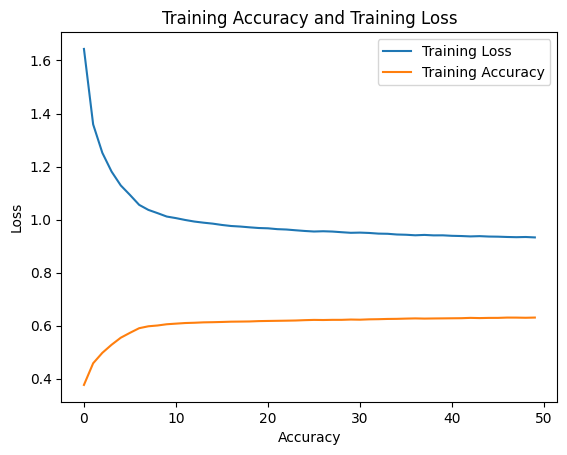

In [18]:
# Plot training loss and validation/test loss over each epoch of training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy and Training Loss')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.legend()

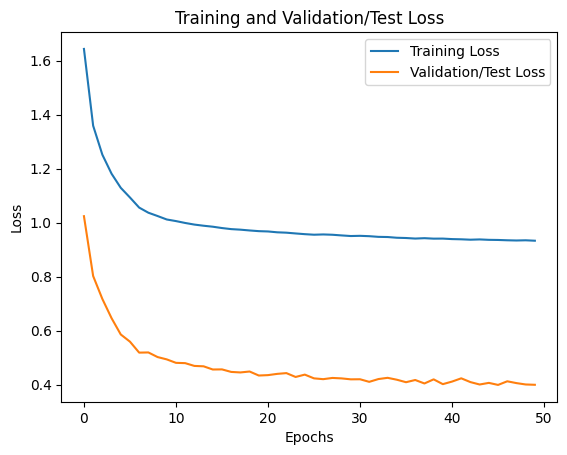

In [19]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation/Test Loss')
plt.title('Training and Validation/Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='CMRmap')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ##plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  ##plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid RF-LSTM Model


ValueError: ignored

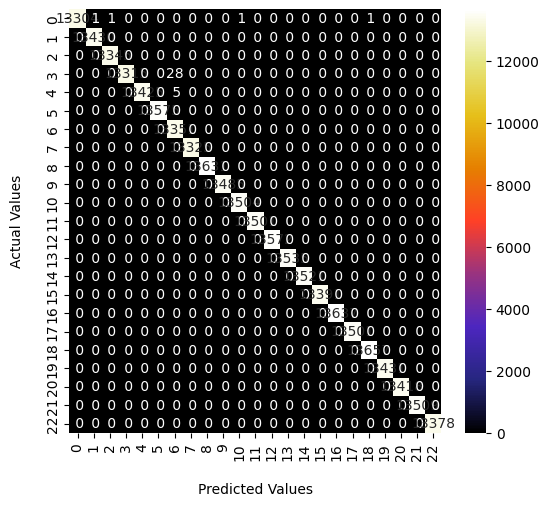

In [22]:
print("Confusion Matrix of Hybrid RF-LSTM Model")
conf_mat(y_test, test_rf_lstm_predictions)

In [23]:
report = classification_report(y_test, test_rf_lstm_predictions, output_dict=True)
detection_rates = {}
for cls in range(23):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates of Hybrid RF-LSTM Model:", detection_rates)

Detection rates of Hybrid RF-LSTM Model: {0: 0.9996994289149383, 1: 1.0, 2: 1.0, 3: 0.9979015213969872, 4: 0.9996276991809382, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0}


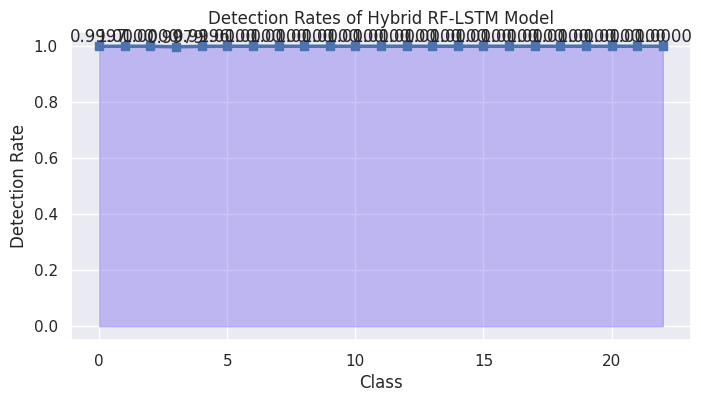

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

report = classification_report(y_test, test_rf_lstm_predictions, output_dict=True)
detection_rates = {}
for cls in range(23):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']

# Extract the class labels and detection rates
labels = list(detection_rates.keys())
rates = list(detection_rates.values())

# Plot the line graph with filled area and labels
plt.figure(figsize=(8, 4))
plt.plot(labels, rates, marker='s', linestyle='-', linewidth=2.5)
plt.fill_between(labels, rates, color='mediumslateblue', alpha=0.4)

# Add labels to each data point
for i in range(len(labels)):
    plt.text(labels[i], rates[i], "{:.4f}".format(rates[i]), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Detection Rate')
plt.title('Detection Rates of Hybrid RF-LSTM Model')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

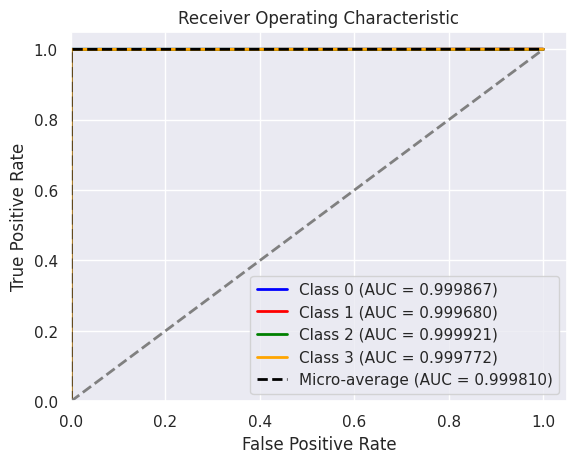

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
#from keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils

# Convert y_test and test_rf_lstm_predictions to one-hot encoded format
y_test_onehot = np_utils.to_categorical(np.argmax(y_test, axis=1))
test_rf_lstm_predictions_onehot = np_utils.to_categorical(test_rf_lstm_predictions, num_classes=4)  # Convert to one-hot encoded format with 4 classes

# Compute the AUC and ROC curves for each class
n_classes = y_test_onehot.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], test_rf_lstm_predictions_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), test_rf_lstm_predictions_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curves
plt.figure()
colors = ['blue', 'red', 'green', 'orange']  # Adjust the colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.6f})'.format(i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='black', lw=2, linestyle='--', label='Micro-average (AUC = {0:0.6f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print confusion matrix and classification report
##print(confusion_matrix(np.argmax(y_test_onehot, axis=1), np.argmax(test_rf_features_onehot, axis=1)))
##print(classification_report(np.argmax(y_test_onehot, axis=1), np.argmax(test_rf_features_onehot, axis=1)))

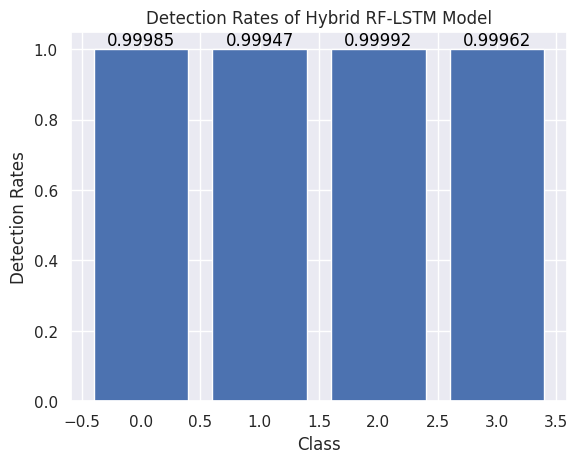

In [ ]:
import matplotlib.pyplot as plt

# Extract the labels and rates from the detection rates dictionary
labels = list(detection_rates.keys())
rates = list(detection_rates.values())

# Plot the bar chart
plt.bar(labels, rates)

# Add labels and units to each bar
for i in range(len(labels)):
    plt.text(labels[i], rates[i], "{:.5f}".format(rates[i]), ha='center', va='bottom', color='black')

# Add axis labels and title
plt.xlabel('Class')
plt.ylabel('Detection Rates')
plt.title('Detection Rates of Hybrid RF-LSTM Model')

# Display the plot
plt.show()